In [1]:
from utils.Dataset import Dataset
import numpy as np
import pandas as pd

In [4]:
#Full dump
dataset = Dataset(lateralize=False, reduced=False)
dataset.preload_cache()
dataset.save_dump()

Preloading cache:   3%|▎         | 515/20486 [00:03<02:17, 145.60it/s]


KeyboardInterrupt: 

In [2]:
#Reduced dump
dataset_reduced = Dataset(lateralize=False, reduced=True, n=500)
dataset_reduced.preload_cache()
dataset_reduced.save_dump("dump_cache_reduced.npz")


Preloading cache: 100%|██████████| 440/440 [00:08<00:00, 52.01it/s]


In [ ]:
# import sys
# is_colab = 'google.colab' in sys.modules

In [ ]:
# print("is_colab: ",is_colab)

In [3]:
dataset_reduced_half = Dataset(lateralize=False, reduced=True, n=5000)
dataset_reduced_half.preload_cache()
dataset_reduced_half.save_dump("dump_cache_reduced_quart.npz")

Preloading cache: 100%|██████████| 4514/4514 [01:15<00:00, 59.76it/s]


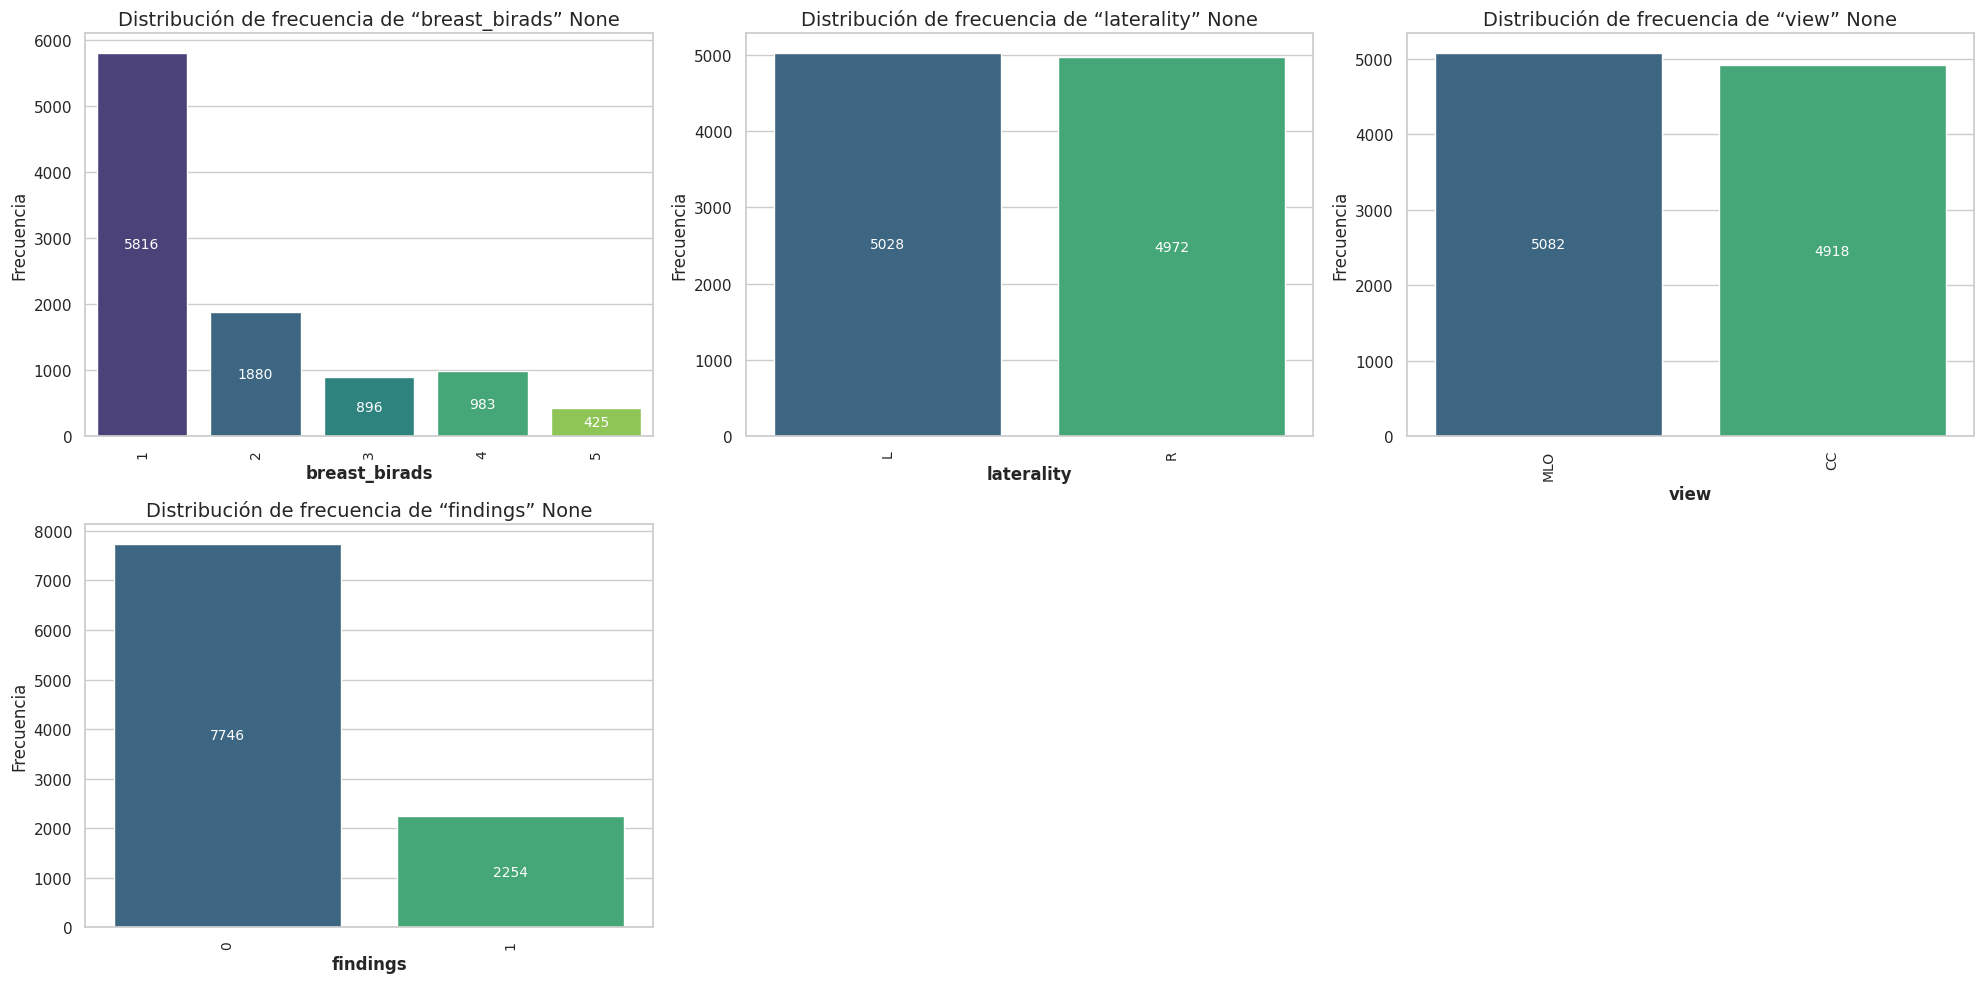

In [4]:
dataset_reduced_half.stats()

In [6]:
#Reduced dump
dataset_full = Dataset()
dataset_full.preload_cache()
dataset_full.save_dump("dump_cache_full.npz")

Preloading cache: 100%|██████████| 20000/20000 [02:26<00:00, 136.78it/s]


In [6]:
dataset_balanced =  Dataset()
dataset_balanced_training = dataset_balanced[dataset_balanced["split"]=="training"]
dataset_balanced_training_fix = pd.concat([dataset_balanced_training[dataset_balanced_training["findings"]==1], dataset_balanced_training[dataset_balanced_training["findings"]==0].head(1802)], ignore_index=True)
dataset_balanced_test = dataset_balanced[dataset_balanced["split"]=="test"]
dataset_balanced_test_fix = pd.concat([dataset_balanced_test[dataset_balanced_test["findings"]==1], dataset_balanced_test[dataset_balanced_test["findings"]==0].head(452)], ignore_index=True)
dataset_balanced_fixed = pd.concat([dataset_balanced_training_fix, dataset_balanced_test_fix], ignore_index=True)
dataset_balanced_fixed.to_csv("dataset_balanced.csv", index=False)
dataset_balanced_fixed.preload_cache()
dataset_balanced_fixed.save_dump("dump_cache_balanced.npz")

In [15]:
ds =  Dataset()
values = {'Mass'}

df1 = ds[
    (ds["split"] == "training") &
    (ds["finding_categories"].apply(lambda l: any(v in l for v in values)))
]


# dataset_balanced_training_fix = pd.concat(dataset_balanced[(dataset_balanced["split"]=="training")&(dataset_balanced['finding_categories'].apply(lambda l: any(v in l for v in values)))],dataset_balanced[(dataset_balanced["split"]=="training")].head(989), ignore_index=True)
# dataset_balanced_test_fix = pd.concat([dataset_balanced_test[dataset_balanced_test["findings"]==1], dataset_balanced_test[dataset_balanced_test["findings"]==0].head(452)], ignore_index=True)
# dataset_balanced_fixed = pd.concat([dataset_balanced_training_fix, dataset_balanced_test_fix], ignore_index=True)
# dataset_balanced_fixed.to_csv("dataset_balanced_mass.csv", index=False)
# dataset_balanced_fixed.preload_cache()
# dataset_balanced_fixed.save_dump("dump_cache_balanced_mass.npz")
dataset_balanced_fixed.stats()

TypeError: concat() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given

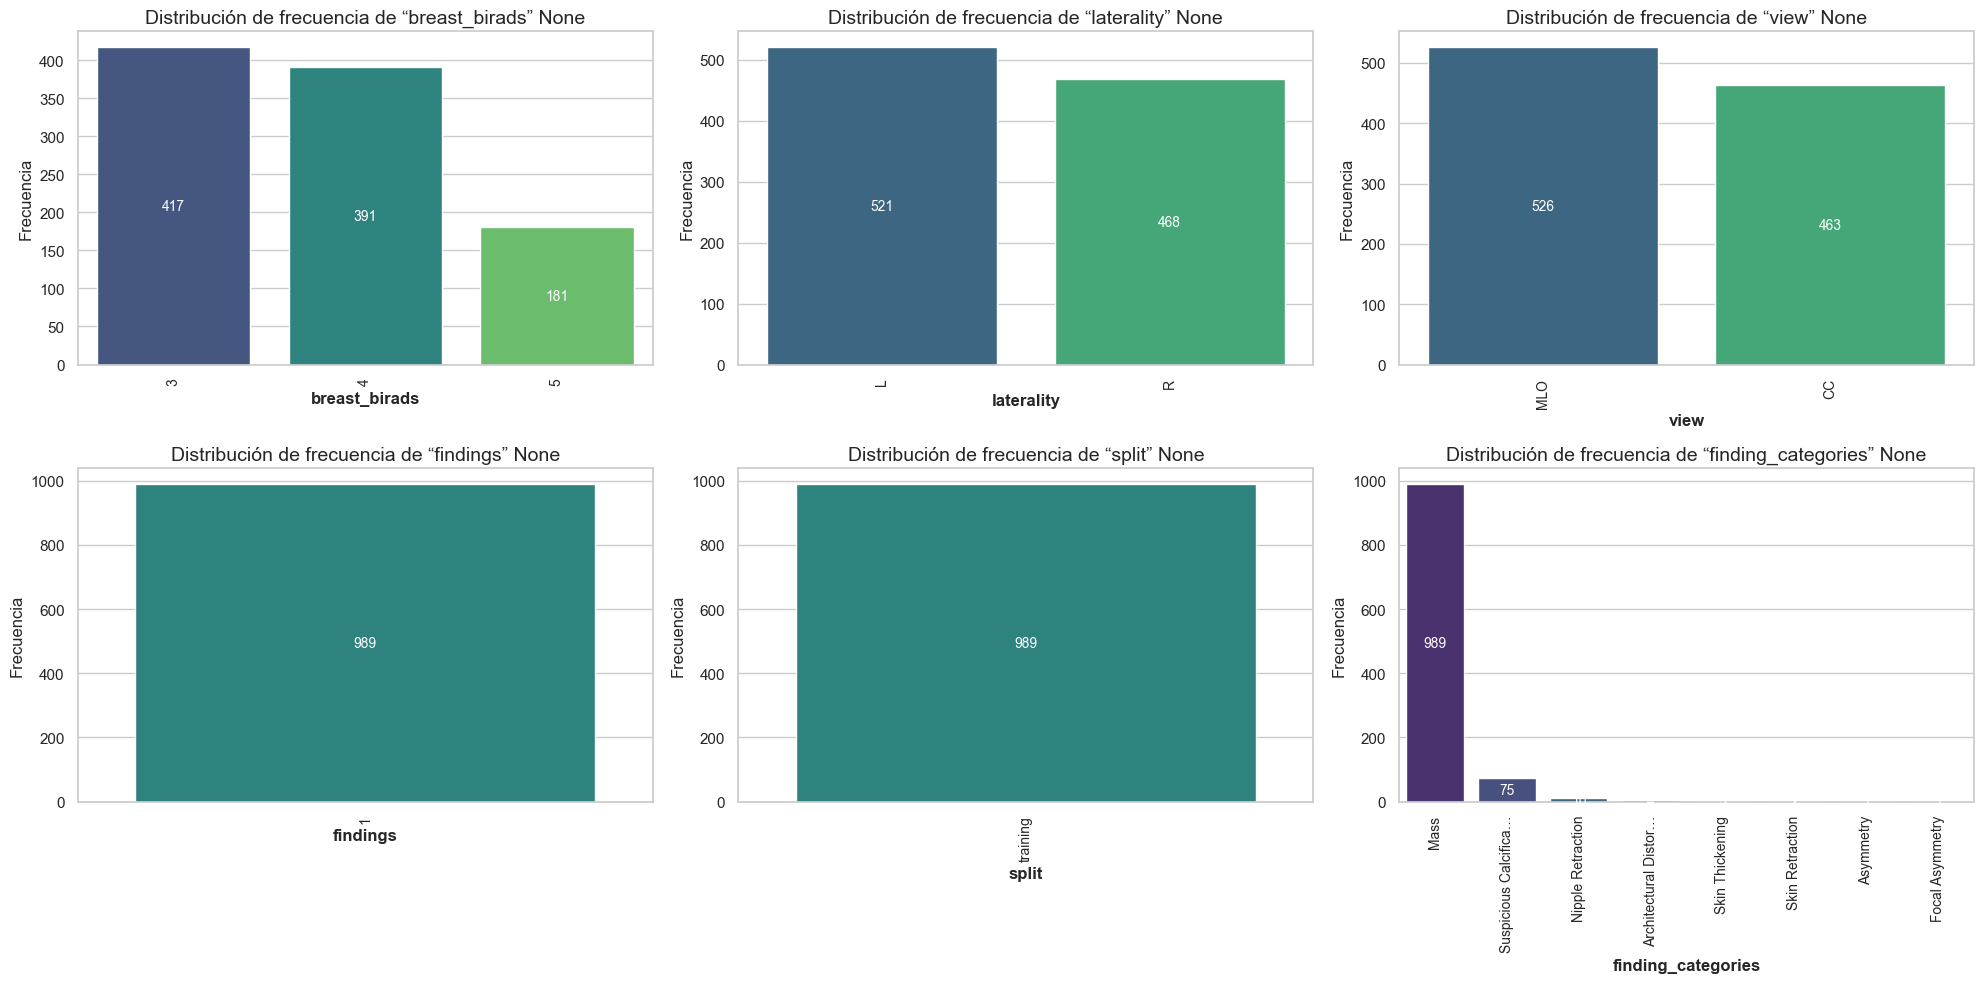

In [14]:
dataset_balanced[(dataset_balanced["split"]=="training")&(dataset_balanced['finding_categories'].apply(lambda l: any(v in l for v in values)))].stats()